In [39]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:0000:010:01


In [12]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [4]:
bq = bigquery.Client()

In [3]:
q = """
SELECT * FROM st-data-project.fx_data.eurusd_hourly
"""

In [8]:
df_fx = bq.query(q).to_dataframe()

In [27]:
df_fx.sort_values(by = 'ts', inplace = True)

<Axes: xlabel='ts'>

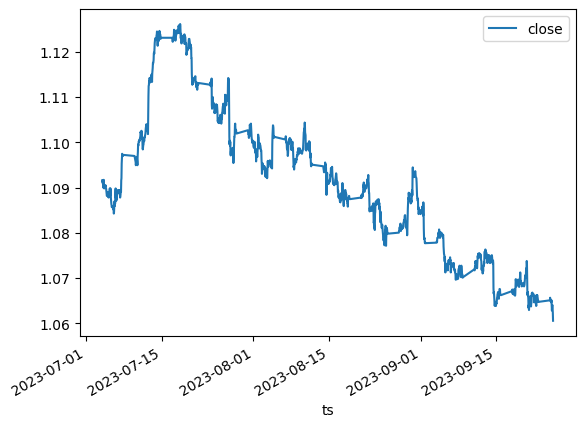

In [24]:
df_fx.plot(x = 'ts', y = 'close')

In [61]:
# Load/split your data

train, test = train_test_split(df_fx.close.iloc[224:], train_size=900)

# Fit your model
model = pm.auto_arima(train)

# make your forecasts
forecasts = model.predict(12)  # predict N steps into the future

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [64]:
new_ts = [df_fx.ts.iloc[-1] + pd.Timedelta(hours = x) for x in range(1,13)]

In [65]:
new_ts

[Timestamp('2023-09-25 14:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 15:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 16:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 17:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 18:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 19:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 20:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 21:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 22:00:00+0000', tz='UTC'),
 Timestamp('2023-09-25 23:00:00+0000', tz='UTC'),
 Timestamp('2023-09-26 00:00:00+0000', tz='UTC'),
 Timestamp('2023-09-26 01:00:00+0000', tz='UTC')]

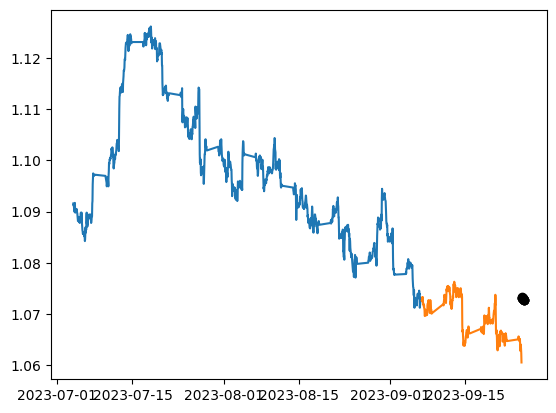

In [70]:
plt.plot(df_fx.ts[:-300], df_fx.close[:-300])
plt.plot(df_fx.ts[-300:], df_fx.close[-300:])
plt.plot(new_ts, forecasts, color = 'k', marker = 'o');
# plt.plot(df_fx.close[-300:], color = 'k');

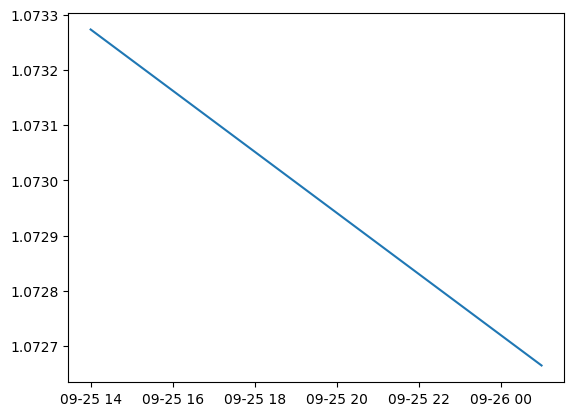

In [71]:
plt.plot(new_ts, forecasts);